In [13]:
import cv2 
import os
import matplotlib.pyplot as plt

In [14]:
# Resize images to a similar dimension
# This helps improve accuracy and decreases unnecessarily high number of keypoints

def imageResizeTrain(image):
    maimage_Testing_ListD = 1024
    height,width = image.shape[:2]
    aspectRatio = width/height
    if aspectRatio < 1:
        newSize = (int(maimage_Testing_ListD*aspectRatio),maimage_Testing_ListD)
    else:
        newSize = (maimage_Testing_ListD,int(maimage_Testing_ListD/aspectRatio))
    image = cv2.resize(image,newSize)
    return image

def imageResizeTest(image):
    maimage_Testing_ListD = 1024
    height,width = image.shape[:2]
    aspectRatio = width/height
    if aspectRatio < 1:
        newSize = (int(maimage_Testing_ListD*aspectRatio),maimage_Testing_ListD)
    else:
        newSize = (maimage_Testing_ListD,int(maimage_Testing_ListD/aspectRatio))
    image = cv2.resize(image,newSize)
    return image

In [15]:
base_folder = "Dataset"

training_folder = os.path.join(base_folder, "Training")
testing_folder = os.path.join(base_folder, "Test")

# Function to get all image file paths in a folder
def get_all_image_paths(folder_path):
    image_paths = []
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith((".png", ".jpg", ".jpeg", ".gif")):
            image_paths.append(os.path.join(folder_path, file_name))
    return image_paths

image_Training_List = get_all_image_paths(training_folder)
image_Testing_List = get_all_image_paths(testing_folder)
print(image_Testing_List)
print(image_Training_List)

['Dataset\\Test\\Banana-02.jpg', 'Dataset\\Test\\Cabbage + Tomato-01.jpg', 'Dataset\\Test\\Cabbage-01.jpg', 'Dataset\\Test\\Cabbage-02.jpg', 'Dataset\\Test\\Carrot-02.jpg', 'Dataset\\Test\\Garlic-01.jpg', 'Dataset\\Test\\Lemon-02.jpg', 'Dataset\\Test\\Mandarin-04.jpg', 'Dataset\\Test\\Onion-01.jpg', 'Dataset\\Test\\Onion-07.jpg', 'Dataset\\Test\\Potato-02.jpg', 'Dataset\\Test\\Potato-06.jpg', 'Dataset\\Test\\Tomato-01.jpg', 'Dataset\\Test\\Two_Tomatos.jpg', 'Dataset\\Test\\Vegetables-02.jpg']
['Dataset\\Training\\Banana-01.jpg', 'Dataset\\Training\\Cabbage + Tomato-02.jpg', 'Dataset\\Training\\Cabbage-03.jpg', 'Dataset\\Training\\Cabbage-04.jpg', 'Dataset\\Training\\Carrot-01.jpg', 'Dataset\\Training\\Carrot-03.jpg', 'Dataset\\Training\\Garlic-02.jpg', 'Dataset\\Training\\Lemon-01.jpg', 'Dataset\\Training\\Mandarin-01.jpg', 'Dataset\\Training\\Mandarin-02.jpg', 'Dataset\\Training\\Mandarin-03.jpg', 'Dataset\\Training\\Mix Vegetables.jpg', 'Dataset\\Training\\Onion-03.jpg', 'Dataset\\Tr

In [16]:
# We use grayscale images for generating keypoints
imagesBW = []
for imageName in image_Training_List:
  imagePath = str(imageName)
  img = cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE)
  img = imageResizeTrain(img)
  imagesBW.append(img) # flag 0 means grayscale

In [17]:
sift = cv2.SIFT_create()

def computeSIFT(image):
  return sift.detectAndCompute(image, None)

In [18]:
keypoints = []
descriptors = []
for i,image in enumerate(imagesBW):
  keypointTemp, descriptorTemp = computeSIFT(image)
  keypoints.append(keypointTemp)
  descriptors.append(descriptorTemp)

In [19]:
def calculateResultsFor(image_Test, keypoint1, descriptor1, j):
  keypoint2 = keypoints[j]
  descriptor2 = descriptors[j]
  matches = calculateMatches(descriptor1, descriptor2)
  score = calculateScore(len(matches),len(keypoint1),len(keypoint2))
  plot = getPlotFor(image_Test,j,keypoint1,keypoint2,matches)
  print(f"Results for {image_Test} and {image_Training_List[j]}:")
  print(f"Number of matches: {len(matches)}")
  print(f"Number of keypoints in {image_Test}: {len(keypoint1)}")
  print(f"Number of keypoints in {image_Training_List[j]}: {len(keypoint2)}")
  print(f"Number of descriptors in {image_Test}: {len(descriptor1)}")
  print(f"Number of descriptors in {image_Training_List[j]}: {len(descriptor2)}")
  print(f"Score: {score:.2f}%")
  plt.imshow(plot),plt.show()

In [20]:
def getPlotFor(image_Test,j,keypoint1,keypoint2,matches):
  image1 = imageResizeTest(cv2.imread(image_Test,cv2.IMREAD_GRAYSCALE))
  image2 = imageResizeTrain(cv2.imread(image_Training_List[j],cv2.IMREAD_GRAYSCALE))
  return getPlot(image1,image2,keypoint1,keypoint2,matches)

In [21]:
def calculateScore(matches,keypoint1,keypoint2):
  return 100 * (matches/max(keypoint1,keypoint2))

In [22]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
def calculateMatches(descriptor1,descriptor2):
  matches = bf.match(descriptor1,descriptor2)
  matches = sorted(matches, key = lambda image_Testing_List:image_Testing_List.distance)
  return matches

In [23]:
def getPlot(image1,image2,keypoint1,keypoint2,matches):
  matchPlot = cv2.drawMatches(image1, keypoint1, image2, keypoint2, matches[:50], image2, flags=2)
  return matchPlot

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Banana-01.jpg:
Number of matches: 147
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Banana-01.jpg: 370
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Banana-01.jpg: 370
Score: 5.40%


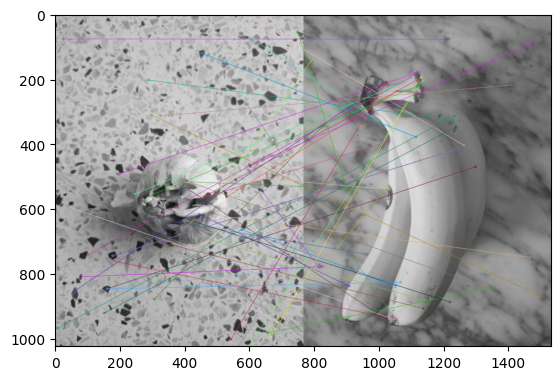

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Cabbage + Tomato-02.jpg:
Number of matches: 249
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Cabbage + Tomato-02.jpg: 854
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Cabbage + Tomato-02.jpg: 854
Score: 9.15%


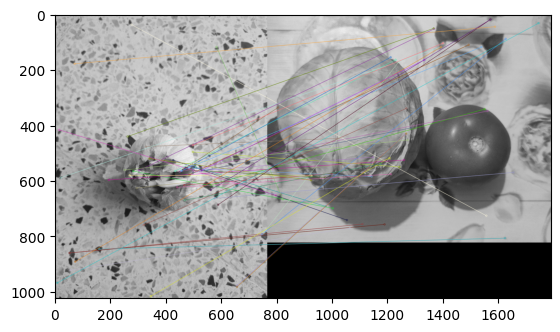

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Cabbage-03.jpg:
Number of matches: 196
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Cabbage-03.jpg: 579
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Cabbage-03.jpg: 579
Score: 7.20%


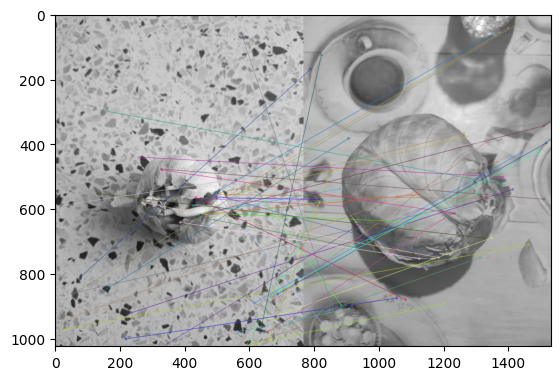

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Cabbage-04.jpg:
Number of matches: 117
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Cabbage-04.jpg: 238
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Cabbage-04.jpg: 238
Score: 4.30%


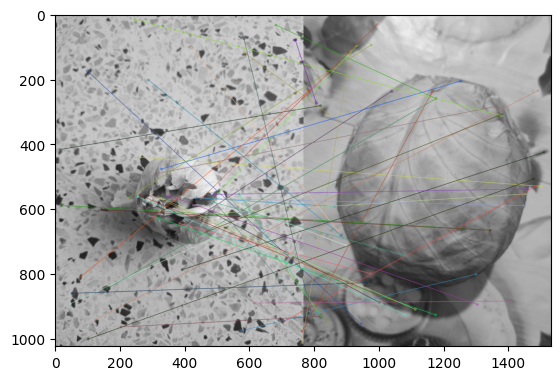

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Carrot-01.jpg:
Number of matches: 287
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Carrot-01.jpg: 1316
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Carrot-01.jpg: 1316
Score: 10.55%


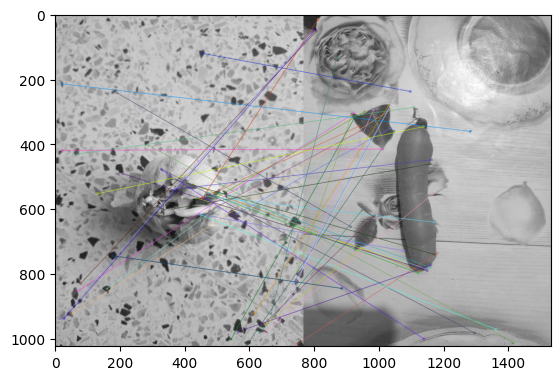

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Carrot-03.jpg:
Number of matches: 157
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Carrot-03.jpg: 724
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Carrot-03.jpg: 724
Score: 5.77%


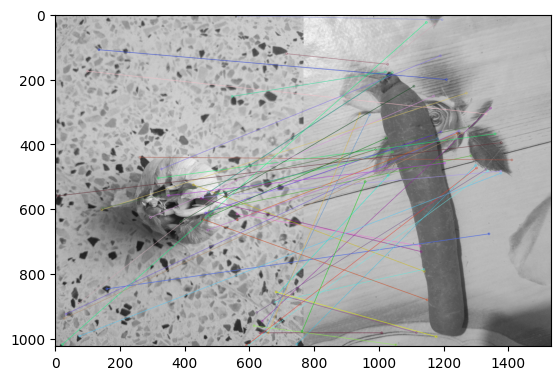

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Garlic-02.jpg:
Number of matches: 797
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Garlic-02.jpg: 5622
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Garlic-02.jpg: 5622
Score: 14.18%


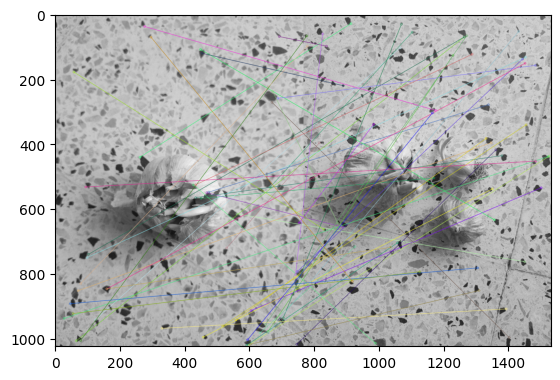

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Lemon-01.jpg:
Number of matches: 150
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Lemon-01.jpg: 368
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Lemon-01.jpg: 368
Score: 5.51%


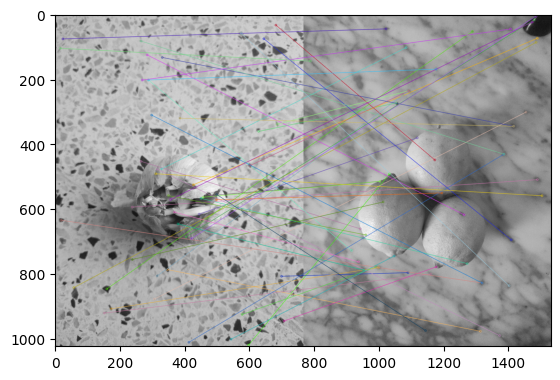

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Mandarin-01.jpg:
Number of matches: 173
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Mandarin-01.jpg: 356
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Mandarin-01.jpg: 356
Score: 6.36%


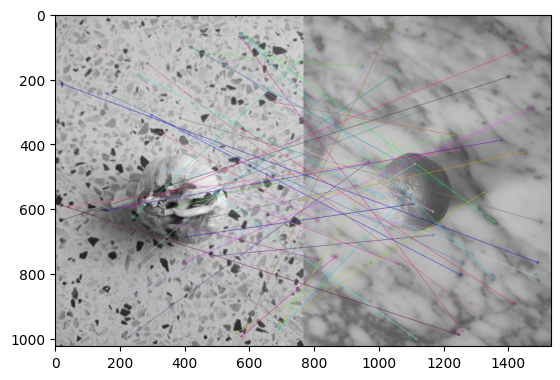

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Mandarin-02.jpg:
Number of matches: 210
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Mandarin-02.jpg: 568
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Mandarin-02.jpg: 568
Score: 7.72%


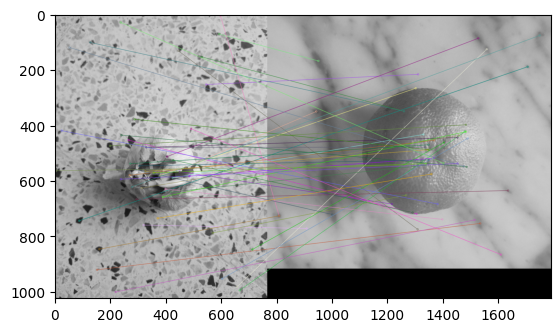

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Mandarin-03.jpg:
Number of matches: 130
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Mandarin-03.jpg: 254
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Mandarin-03.jpg: 254
Score: 4.78%


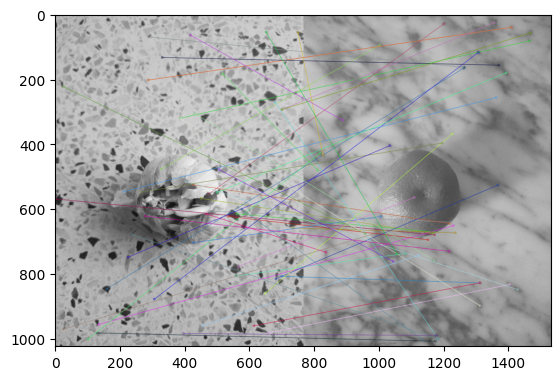

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Mix Vegetables.jpg:
Number of matches: 270
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Mix Vegetables.jpg: 1136
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Mix Vegetables.jpg: 1136
Score: 9.92%


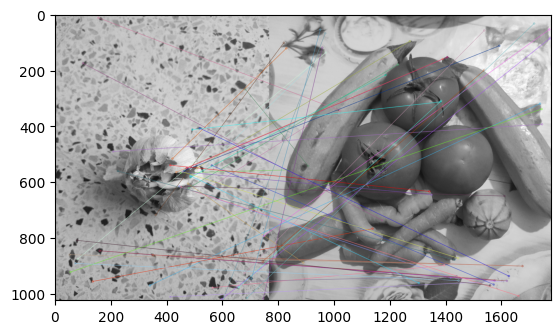

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Onion-03.jpg:
Number of matches: 301
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Onion-03.jpg: 1417
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Onion-03.jpg: 1417
Score: 11.06%


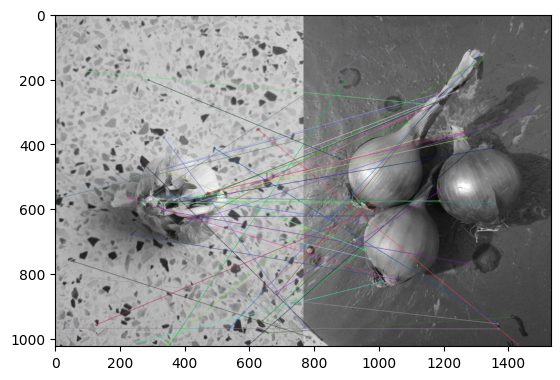

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Onion-05.jpg:
Number of matches: 243
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Onion-05.jpg: 961
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Onion-05.jpg: 961
Score: 8.93%


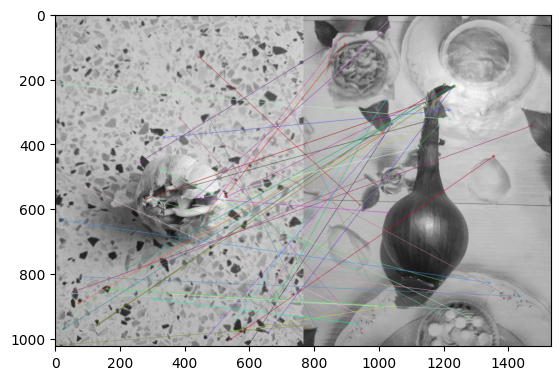

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Onion-06.jpg:
Number of matches: 304
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Onion-06.jpg: 921
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Onion-06.jpg: 921
Score: 11.17%


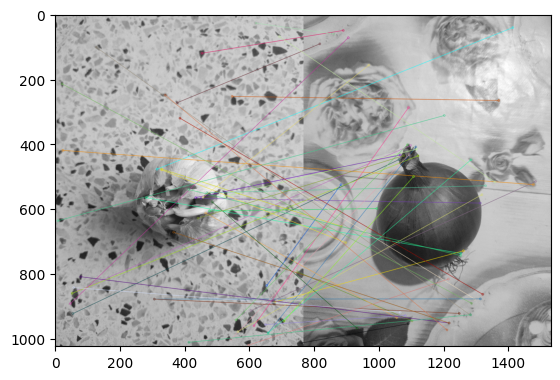

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Orange-04.jpg:
Number of matches: 89
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Orange-04.jpg: 167
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Orange-04.jpg: 167
Score: 3.27%


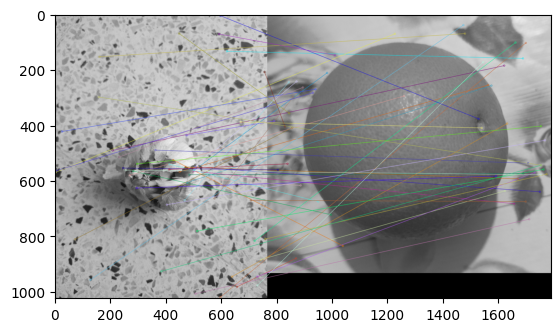

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Oranges.jpg:
Number of matches: 165
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Oranges.jpg: 637
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Oranges.jpg: 637
Score: 6.06%


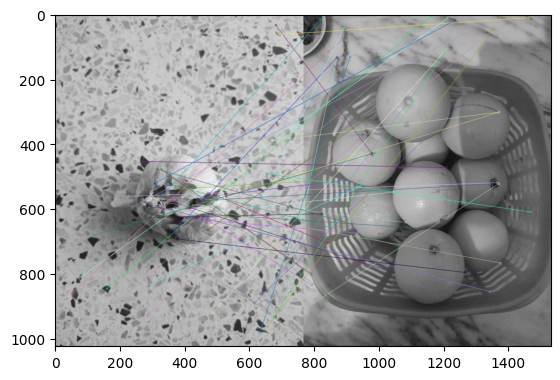

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Potato-01.jpg:
Number of matches: 243
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Potato-01.jpg: 960
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Potato-01.jpg: 960
Score: 8.93%


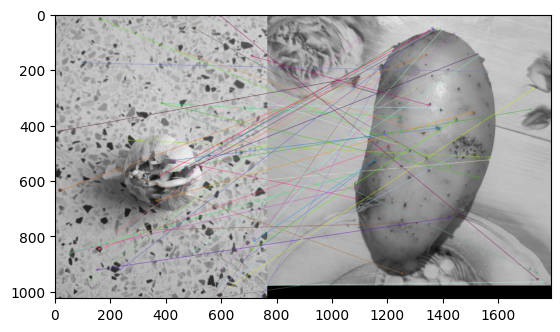

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Potato-07.jpg:
Number of matches: 352
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Potato-07.jpg: 1733
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Potato-07.jpg: 1733
Score: 12.94%


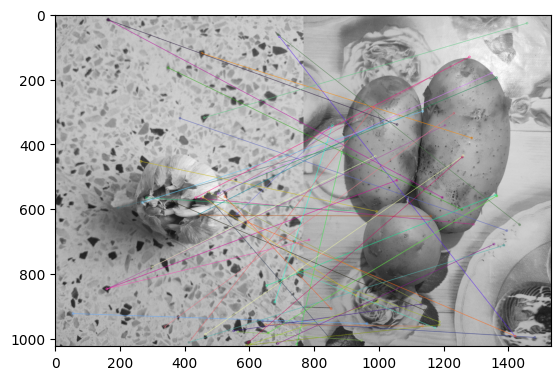

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Tomato-02.jpg:
Number of matches: 162
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Tomato-02.jpg: 410
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Tomato-02.jpg: 410
Score: 5.95%


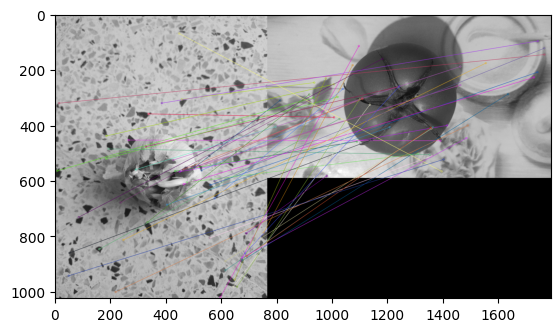

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Tomato-03.jpg:
Number of matches: 214
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Tomato-03.jpg: 526
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Tomato-03.jpg: 526
Score: 7.86%


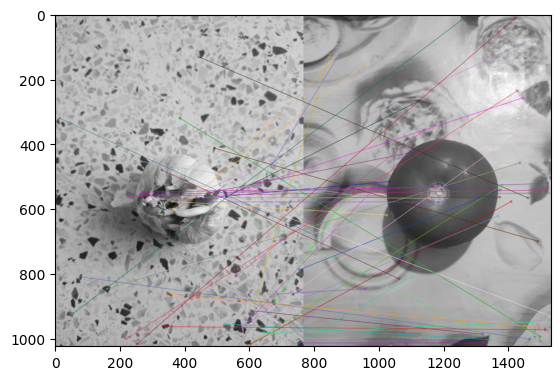

Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Two_Tomatos-01.jpg:
Number of matches: 270
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Two_Tomatos-01.jpg: 959
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Two_Tomatos-01.jpg: 959
Score: 9.92%


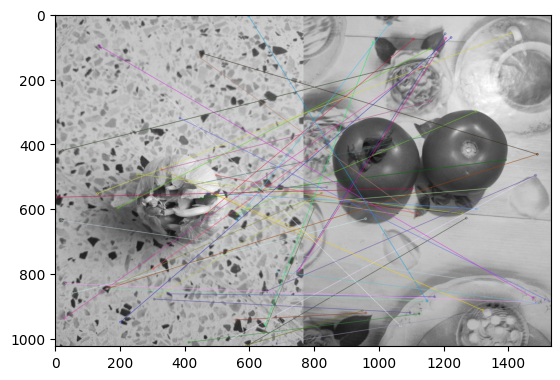

The most similar image with Dataset\Test\Garlic-01.jpg from Training group is image: Dataset\Training\Garlic-02.jpg with score of 14.18%
Results for Dataset\Test\Garlic-01.jpg and Dataset\Training\Garlic-02.jpg:
Number of matches: 797
Number of keypoints in Dataset\Test\Garlic-01.jpg: 2721
Number of keypoints in Dataset\Training\Garlic-02.jpg: 5622
Number of descriptors in Dataset\Test\Garlic-01.jpg: 2721
Number of descriptors in Dataset\Training\Garlic-02.jpg: 5622
Score: 14.18%


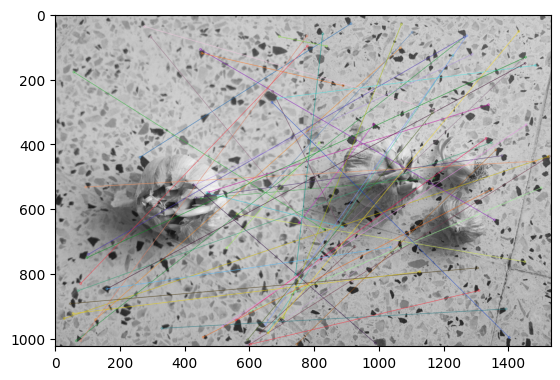

In [24]:
def main():
  i = 5  # Index for Testing images
  j = 0  # Index for Training images

  max_Score = 0.0

  test_image_name = image_Testing_List[i]
  test_image_bw = imageResizeTrain(cv2.imread(test_image_name, cv2.IMREAD_GRAYSCALE))

  test_keypoints, test_descriptors = computeSIFT(test_image_bw)

  # Match the training image with each testing image
  for train_image_name in image_Training_List:
    # Load and preprocess the testing image
    train_image_bw = imageResizeTrain(cv2.imread(train_image_name, cv2.IMREAD_GRAYSCALE))

    
    train_keypoints, train_descriptors = computeSIFT(train_image_bw)

    # Calculate matches and score
    matches = calculateMatches(train_descriptors, test_descriptors)
    calculateResultsFor(test_image_name, test_keypoints, test_descriptors, j)
    
    current_Score = calculateScore(len(matches), len(test_keypoints), len(train_keypoints))
    if current_Score > max_Score:
      similar_image_name = train_image_name
      max_Score = current_Score
      m = j
    
    j = j+1

  print(f"The most similar image with {test_image_name} from Training group is image: {similar_image_name} with score of {max_Score:.2f}%")
  calculateResultsFor(test_image_name, test_keypoints, test_descriptors, m)

if __name__ == "__main__":
  main()
